# HW4 Solution
## Student Name: Jason Miller

---

**NOTE:**
Change the notebook filename in this way:
```
hw4_solution_lastname_firstname.ipynb
```

---

As you can see, you can write an inline equation in this way: $P(\theta)$.

Or you can write a block equation in this way
$$
\mathcal{N}(\mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

This is a [Markdown overview](https://colab.research.google.com/notebooks/markdown_guide.ipynb) if you are not familiar with this text editing formalism.

---


In [1]:
# You can only import these libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


## Problem 1.1

Let n = 64 data points and p = 6830 features.
How many principal components with non-zero variance would we get? Explain why.

### 1.1 Solution

We get 63 non-zero principal components at most.

Our textbook (James, Intro to Stat Learning, page 380) 
uses the formula M=min(n−1,p) 
where M principal components can exactly represent all the data.  

The principal components are the minimum orthogonal dimensions,
each of which captures some of the data's variance.
At n=1 there is no variance and at n=2 either 
data point could be expressed as a variation on the other.
In contrast, there could be variance at p=1 and n=2.
At n=64, at most 63 data points could rotate into 
a dimension that is orthogonal to all the others.


## Problem 1.2

### 1.2.a Question

Which PCA has the variables standardized to variance 1 before calculating the covariance matrix and its eigenvalues? Explain briefly.

### 1.2.a Solution

PCA2 uses standardized variance.

The evidence comes from PCA1.
The PCA1 scree plot (fig 1)
and the projections (table 3) 
concentrate nearly 100% of the variance in one PC. 
We were not given feature variances but we do have ranges (table 2).
The range of one feature (Area, max-min=565K) 
is 20X larger than the next largest (Population, max-min=21K).
Without normalization, it makes sense that the 
Area variance would dominate.

### 1.2.b Question
From the Scree Plot of PCA1 in Figure 1, where do you locate a “big gap” or elbow, and what is the reasonable number of principal components to be retained?
### 1.2.b Solution
Visual inspection of fig 1 says the elbow occurs at X=2. 

A reasonable number of PCs is 1.
That is because the elbow is sharp and the curve is flat from X=2 to X=8. 
Thus, most variance can be explained with 1 PC.
However, if you wish to make a 2D plot, you could retain the top 2 PCs.

### 1.2.c Question
Describe, in words, the first two principal components of PCA1.
### 1.2.c Solution
Table 3 shows the projections of features to PC1 and PC2 for PCA1.

PC1 is composed almost entirely of the Area feature.
Among its other contributors,
the leaders are Population and Income
at 1 and 3 one thousandths as strong, repsectively.

PC2 is composed almost entirely of the Population feature.
The nearest other contributor is Income which is only 3% as strong.


### 1.2.d Question
From the Scree Plot of PCA2 in Figure 2, where is a “big gap” or elbow and what is the reasonable number of principal components to be retained?
### 1.2.d Solution
Visual inspection of fig 2 does not present a precise elbow.
A judgement call is required, possibly informed by outside factors
such as what portion of the variance needs to be explained.
A reasonable elbow designation is at X=5,
with the first 5 PCs retained.

### 1.2.e Question
Describe, in words, the first two principal components of PCA2.
### 1.2.e Solution
Table 4 shows the projections of features to PC1 and PC2 of PCA2.
The signs indicate different directions of influence
but the absolute values indicate relative strengths.

PC1 is a fairly even mix of six of the eight features, 
whereas PC2 has more skew:
* PC1 tops: Illiteracy (0.47), Murder (0.44), HSgrad (-0.43), LifeExp (-0.41), Frost (-0.36), and Income (-0.30). 
* PC2 tops: Area (0.59), Income (0.52), Population (0.41), Murder (0.31), and HSgrad (0.30). 

PC1 and PC2 have no overlap among their top 3
so the first two PCs complement each other somewhat:
* PC1 top 3: Illiteracy, Murder, HSgrad
* PC2 top 3: Area, Income, Population

### 1.2.f Problem
Would you rather use PCA2 or PCA1 for the PCA analysis? Pick one and explain your choice. 
### 1.2.f Solution
PCA2.

The problem with this data is the heterogeneous nature of the features.
There is no obvious way to compare a difference of 2K acres (Area)
to a difference of 2K dollars (Income). 

PCA1 did nothing to address this problem.
The PCA1 approach is ok for the MNIST digits below,
where all the features have the same meaning (pixel intensity),
but it is not ok for the US states data.

In contrast, PCA2 used variance standardized to one.
This allowed PCA2 to compare heterogeneous features by 
something they all have in common: Z-score (essentially). 
Thus, I find PCA2 preferable for the US states data.

## Problem 2

In [2]:
# get MNIST data from online repository
# Getting the dataset is the only reason why we used sklearn. It cannot be used for other purposes
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# convert string labels to integers
y = np.array([int(v) for v in y])[:,np.newaxis]

print(np.shape(x))
print(np.shape(y))

(70000, 784)
(70000, 1)


In [3]:
# Computes PCA

numClasses = 10
numEig = 100
picSize = 28*28
trainSize = 60000

# zero-mean training data
trainY = y[0:trainSize,:]
trainMean = np.mean(x[0:trainSize,:], axis=0) # zero-centering
trainX = x[0:trainSize,:] - trainMean

# testing data
testY = y[trainSize:,:]
testX = x[trainSize:,:]

cov = np.cov(trainX.T)  ## 784x784 pixel covariance
print(np.shape(cov))
# w = eigenvalues (784,)
# v = unit eigenvectors (one hot)
w, v = np.linalg.eig(cov)   ## eigen decomposition of covariance matrix
ws = np.sort(w)  # sort the eigenvalues (784,) ascending
ws = ws[::-1]  # ??? -1 takes all but the last, but ws is still (784,)
tmp = np.array(v);
for i in range(0,numEig):
    tmp[:,i] = v[:,np.where(w==ws[i])[0][0]]
v = tmp[:,:numEig].real

#free memory
del cov, w, tmp

(784, 784)


### Data exploration

In [4]:
# Example eigenvalues in decreasing order
print(ws[0])  
print(ws[100])  
print(ws[400])  
print(ws[727])  

332724.667446568
3373.7058208668345
203.5434875144455
0.0


In [5]:
# Weights for spreading one pixel over 100 PC dimensions.
# Weights are specific to each pixel coordinate.
print(np.shape(v))   # (784 pixels x 100 PCs)
print(v[0])  # There is no weight for a corner pixel like 0,0 or 28,28
print(v[100])  # There is weight for a center pixel like 10,10
print(v[783])  # There is no weight for a corner pixel like 0,0 or 28,28

(784, 100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[-0.00886485 -0.00812866  0.02139428  0.03762675 -0.01826191 -0.03010306
  0.0123972   0.00144399 -0.0237319   0.00464373 -0.01634536  0.00574509
 -0.00348484  0.00810631  0.01117779  0.01202791 -0.02226615  0.02077036
 -0.00288519 -0.01172428  0.02275511  0.0134019  -0.0167441   0.01411576
 -0.01259602  0.00670511 -0.00128385  0.02387361  0.00343945 -0.00249084
 -0.05410934  0.0037329  -0.03489022 -0.03705471 -0.02407548 -0.00354087
  0.02807565  0.04228606  0.00370142 -0.00594182 -0.05128516  0.03186546
  0.03818421 -0.0368326   0.00027684 -0.02802877  0.05547744  0.01452484
  0.04431241  0.08902126  0.04319275 -0.01961667 -0.00907145  0.03536842
  0.03637595  0.02066894 -

In [6]:
#Digit representations in the PC domain
omega = np.zeros((numClasses, numEig ,picSize))  
print(np.shape(omega))   # 10 x 100 x 728
for i in range(0,numClasses):
    trainDigit = trainX[np.where(trainY==i)[0]]   # pixels of all images with this digit label
    print("calculating weights for digit %d, samples %d" % (i,len(trainDigit)))
    for k in range(0,len(trainDigit)):   # loop over k images
        tmp = v.T * trainDigit[k]  # 100x728 weights dot 728 pixels = 100x784
        omega[i] += tmp
        np.linalg.norm(omega[3])   # why class 3 ???
    omega[i] /= len(trainDigit)    # average weight for this digit, 100 eig x 728 pixel
    nr=np.linalg.norm(omega[i])  # nr not used


(10, 100, 784)
calculating weights for digit 0, samples 5923
calculating weights for digit 1, samples 6742
calculating weights for digit 2, samples 5958
calculating weights for digit 3, samples 6131
calculating weights for digit 4, samples 5842
calculating weights for digit 5, samples 5421
calculating weights for digit 6, samples 5918
calculating weights for digit 7, samples 6265
calculating weights for digit 8, samples 5851
calculating weights for digit 9, samples 5949


### Code modified to introduce a classify() function

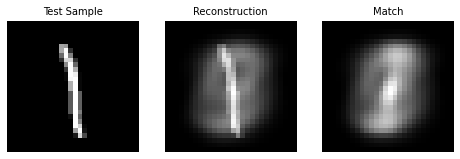

Test digit = 1 , Match digit = 1


In [7]:
#Randomly select a test sample
test_sample = np.random.randint(0, len(testX)) 
orig = testX[test_sample]
zero_center = (orig - trainMean) # zero-centering, now applied to test data
omega_m = v.T * zero_center  # transform to PC axiis 

#find best match
dist = np.zeros((numClasses))
#dist2 = np.zeros((numClasses)) # not used

def classify(test_sample,V):
    orig = testX[test_sample]
    zero_center = (orig - trainMean) # zero-centering, now applied to test data
    omega_m = V.T * zero_center  # transform to PC axiis 
    for i in range(0,numClasses):
        dist[i] = np.linalg.norm(omega[i] - omega_m)
        #dist2[i] = np.linalg.norm(omega[i])  # not used
    return dist.argmin()

i=classify(test_sample,v)

#reconstruct
recon = v.T * omega_m
recon = np.sum(recon,axis=0) + trainMean
match = v.T * omega[i]
match = np.sum(match, axis=0) + trainMean

#show result
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(orig.reshape(28,28), cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Test Sample', fontsize=10)

ax2.imshow(recon.reshape(28,28), cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Reconstruction', fontsize=10)

ax3.imshow(match.reshape(28,28), cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Match', fontsize=10)

plt.show()
plt.close()
print("Test digit = %d , Match digit = %d" % (testY[test_sample],i) )

In [8]:
# Code to solve Problem 8
# Remember that only numpy and matplotlib can be used

### Preparations

In [9]:
# Make sure we can use dot product to replace the inside loop in next cell.
i=0
m=0
s=0
for j in range(picSize):
    data = trainX[i][j]
    weight = v[j][m]
    s += weight * data
print(trainX[i].shape)
print(s)
vm = v[:,m]
print(v.shape)
dp = np.dot(trainX[i],vm)
print(dp)
# Yes, they are (nearly) the same.

(784,)
-123.93258865866109
(784, 100)
-123.93258865866115


In [10]:
# Algorithm for sum of variance based on our textbook
# (James, Intro Stat Learn, eq 10.7)
# for m in M=100 PCs ...
#    var(m)=0
#    for i in n=60000 pictures...
#       sum = 0
#       for j in p=728 pixels...
#           sum += weight(j,m) * pixel(i,j)   
#       var += sum^2
variance=[]
for m in range(numEig):
    var = 0
    for i in range(trainSize):
        s=0
        dp = np.dot(trainX[i],v[:,m])
        s += dp
        ss = s*s
        var += ss
    var /= trainSize
    #print("m=",m,"var=",var)
    variance.append(var)
print(variance)
# In a separate notebook, we validated the values below by 
# obtaining the same values with
# sklearn.decomposition.PCA.explained_variance_

[332719.12203544175, 243279.88433818202, 211503.84193548118, 184773.30625575615, 166924.04919680033, 147842.49759263016, 112176.33307507078, 98872.78171992648, 94694.67078222182, 80808.47770153615, 72312.41503256488, 69357.14535496384, 58825.89070160857, 58013.117115313515, 54122.85488616949, 50842.22114258536, 45411.84942951093, 43777.729490583275, 40704.66203105984, 39519.131716712036, 36552.92663576054, 34514.61862556803, 32692.741175233292, 31286.064373453915, 30287.047806920706, 28775.598749043435, 27858.82108334409, 26960.13209868279, 25532.76803475876, 23685.728211134716, 22562.38589243957, 22221.39604691092, 20660.327480325577, 20110.650230831445, 19542.875204406526, 18637.981479870847, 17340.611293172326, 16725.96601510356, 16505.542277546916, 16191.393295758122, 15659.318949662447, 15250.959929289309, 14348.089706438379, 13652.595593243563, 13198.644344179802, 12860.214939392628, 12411.275942262033, 12054.11507352283, 11658.710003160375, 11035.290466112376, 10937.325503666321

## 2.1
Show the scree plot. 
Note our textbook (James, fig 10.4, page 383)
shows scree plots with PVE on the Y-axis. 
PVE = portion of variance explained.
The figures 1 and 2 on the HW plot variance on the Y-axis.
We will follow the HW example and plot variance,
as in eq 10.7 in James.

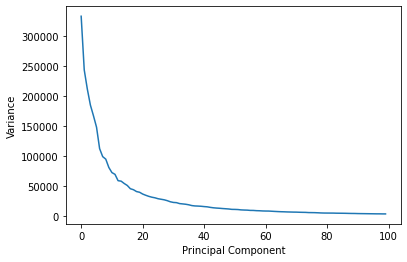

In [11]:
# Scree plot of variance per PC
plt.plot(variance)
plt.ylabel('Variance')
plt.xlabel('Principal Component')
plt.show()

### 2.2
Compute the error rate on the testing dataset, when the digit representation includes the first n = 100 principal components. This is the percentage of test digits that have been incorrectly classified.

In [12]:
print("X",testX.shape)
print("Y",testY.shape)
def compute_error_rate(V):
    TESTSIZE=len(testY)
    results=[]
    for i in range(TESTSIZE):
        label = testY[i]
        pred = classify(i,V)
        zero_one = 0
        if (pred==label):
            zero_one = 1
        results.append(zero_one)
    num_correct = np.count_nonzero(results)
    #print (num_correct, "correct out of", TESTSIZE)
    accuracy = 100.0*num_correct/TESTSIZE
    err_rate = 100.0*(TESTSIZE-num_correct)/TESTSIZE
    return err_rate 
err_rate = compute_error_rate(v)
print ("Error rate = %f%%"%err_rate)

X (10000, 784)
Y (10000, 1)
Error rate = 18.260000%


### 2.3.a
Plot the error rate for a number of principal components in the representation that varies from n = 5 to n = 100. Proceed with increments of 5 components at a time. ...

In [13]:
# First accumulate a list of error rates.
# Do this by ablation i.e. set a range of smaller PC weights to zero.
rates = []
for base in range(5,100+5,5):
    V = np.copy(v)
    for i in range(base,100):
        V[:,i] = 0 
    #print(V[400])
    err_rate = compute_error_rate(V)
    print ("Using %d PCs, error rate = %f%%"%(base,err_rate))
    rates.append(err_rate)
    

Using 5 PCs, error rate = 90.810000%
Using 10 PCs, error rate = 82.660000%
Using 15 PCs, error rate = 70.140000%
Using 20 PCs, error rate = 58.880000%
Using 25 PCs, error rate = 47.020000%
Using 30 PCs, error rate = 37.560000%
Using 35 PCs, error rate = 31.000000%
Using 40 PCs, error rate = 26.510000%
Using 45 PCs, error rate = 23.970000%
Using 50 PCs, error rate = 22.120000%
Using 55 PCs, error rate = 20.790000%
Using 60 PCs, error rate = 19.660000%
Using 65 PCs, error rate = 19.010000%
Using 70 PCs, error rate = 18.640000%
Using 75 PCs, error rate = 18.410000%
Using 80 PCs, error rate = 18.340000%
Using 85 PCs, error rate = 18.330000%
Using 90 PCs, error rate = 18.230000%
Using 95 PCs, error rate = 18.180000%
Using 100 PCs, error rate = 18.260000%


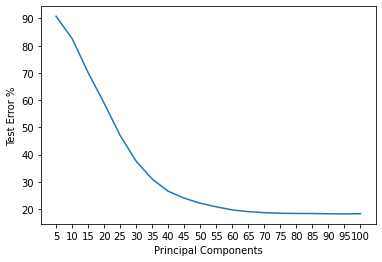

In [14]:
# Now plot the error rates
plt.plot(rates)
plt.ylabel('Test Error %')
plt.xlabel('Principal Components')
plt.xticks(ticks=np.arange(20),labels=np.arange(5, 105, 5)) # X axis labels use step 5
plt.show()

### 2.3.b
... If we are willing to accept an error rate that is up to 20% higher than the best error rate that you found, how many principal components should we use in the representation?


In [15]:
# First, compute 20% of best.
best=18.26
margin = 0.20
print("%f%% better than %f is %f"%(100.0*margin,best,best+(margin*best)))

20.000000% better than 18.260000 is 21.912000


### 2.3.b Solution

ERR(100) = 18.26% = BEST      
ALLOW = 21.91% = BEST * 120%  
ERR(50) = 22.12% = test error with 50 PCS  
ERR(55) = 20.79% = test error with 55 PCs  
MIN(X) such that ( ERR(X) <= ALLOW ) = 55  

Answer = 55.